# G2M insight for Cab Investment firm 

### Statement of the problem

* XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

### Data Set:

I have been provided with 4 individual data sets. Time period of data was from 31/01/2016 to 31/12/2018.
Below are the list of datasets which are provided for the analysis:

* Cab_Data.csv – this file includes details of transaction for 2 cab companies

* Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

* Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

* City.csv – this file contains list of US cities, their population and number of cab users

### Questions to answer through the data to nominate which companies to invest in.


* Which company has the most spread among cities?
* How is the performance of Yellow Cab and Pink Cab
* Which company has the most profit?
* Which Cap firm have increaed profit through same period?
* Which Cab firm have bigger market share?


## EDA
# first explaning the problem and export the data

In [128]:
# import the libraries.

#import nesserly libraties

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import imblearn
import sklearn
import category_encoders as ce

from sklearn.impute import SimpleImputer
from numpy import unique
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


# pd.set_option('max_rows', 300)
pd.options.display.max_rows = 300
pd.plotting.register_matplotlib_converters()

%matplotlib inline

print(sklearn.__version__)
print("Vis setup Complete")
print("Setup complete.\n")

1.1.1
Vis setup Complete
Setup complete.



In [129]:
pd.options.display.max_rows 

300

In [130]:
#designate the path where I've saved cap data
###1###
cap_data_path= "D:/data_science_course/second_week/DataSets/Cab_Data.csv"

cap_data= pd.read_csv(cap_data_path)

###2###
city_data_path= "D:/data_science_course/second_week/DataSets/City.csv"

city_data= pd.read_csv(city_data_path)

###3###
Customer_ID_data_path= "D:/data_science_course/second_week/DataSets/Customer_ID.csv"

Customer_ID_data= pd.read_csv(Customer_ID_data_path)

###4###
Transaction_ID_data_path= "D:/data_science_course/second_week/DataSets/Transaction_ID.csv"

Transaction_ID_data= pd.read_csv(Transaction_ID_data_path)


#show thw first 10 raws of the data




In [131]:
cap_data.head(10)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [132]:
city_data.head(10)


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [133]:
Customer_ID_data.head(10)


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
5,27318,Male,25,13984
6,33788,Male,23,23788
7,34106,Male,19,19980
8,59799,Male,33,19271
9,57982,Male,57,5068


In [134]:
Transaction_ID_data.head(10)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
5,10000016,27318,Cash
6,10000017,33788,Card
7,10000018,34106,Card
8,10000019,59799,Cash
9,10000020,57982,Cash


In [135]:
cap_data.shape

(359392, 7)

## Make sure there is no missing values

In [136]:
#percentage of null value____ cap_data

for i in cap_data:
    null_value = cap_data[i].isnull().sum()
    percentage = (null_value/359392)*100
    print(i,null_value, percentage)

Transaction ID 0 0.0
Date of Travel 0 0.0
Company 0 0.0
City 0 0.0
KM Travelled 0 0.0
Price Charged 0 0.0
Cost of Trip 0 0.0


In [137]:
#percentage of null value____ city_data

for i in city_data:
    null_value1 = city_data[i].isnull().sum()
    percentage1 = (null_value1/359392)*100
    print(i,null_value1, percentage1)

City 0 0.0
Population 0 0.0
Users 0 0.0


In [138]:
#percentage of null value____ Customer_ID_data

for i in Customer_ID_data:
    null_value2 = Customer_ID_data[i].isnull().sum()
    percentage2 = (null_value/359392)*100
    print(i,null_value2, percentage2)

Customer ID 0 0.0
Gender 0 0.0
Age 0 0.0
Income (USD/Month) 0 0.0


In [139]:
#percentage of null value____ Transaction_ID_data

for i in Transaction_ID_data:
    null_value3 = Transaction_ID_data[i].isnull().sum()
    percentage3 = (null_value/359392)*100
    print(i,null_value3, percentage3)

Transaction ID 0 0.0
Customer ID 0 0.0
Payment_Mode 0 0.0


In [140]:
# for i in cap_data['City']:
#     print(i)
cap_data["City"].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

## after make sure of there is no missing data 
### i find out that the data is unreadable >> i will change it the a readable date.

In [141]:
from datetime import datetime, timedelta
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [142]:
for col in cap_data.columns:
    if ' ' in col:
        cap_data = cap_data.rename(columns={col:col.replace(' ','_')})

In [143]:
for col in Transaction_ID_data.columns:
    if ' ' in col:
        Transaction_ID_data = Transaction_ID_data.rename(columns={col:col.replace(' ','_')})

In [144]:
for col in Customer_ID_data.columns:
    if ' ' in col:
        Customer_ID_data = Customer_ID_data.rename(columns={col:col.replace(' ','_')})

### change the date format because we might use it later.

In [145]:
cap_data['Date_of_Travel'] = cap_data['Date_of_Travel'].apply(lambda x:to_date_format(x))


In [146]:
cap_data.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [147]:
months=[]
years =[]
for i in range(len(cap_data['Date_of_Travel'])):
    months.append(cap_data['Date_of_Travel'][i].month)
    years.append(cap_data['Date_of_Travel'][i].year)
cap_data['Month'] = months
cap_data['Year'] = years
cap_data.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016


## Merage all data in a one dataframe

In [148]:
taxi_data = cap_data.merge(Transaction_ID_data, on= 'Transaction_ID').merge(Customer_ID_data, on ='Customer_ID').merge(city_data, on = 'City')

In [149]:
taxi_data.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,2016,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,7,2018,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,11,2018,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,2016,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,4,2018,27703,Card,Male,27,9237,"814,885","24,701"


In [150]:
#add profit colmun

taxi_data['Profit'] = taxi_data['Price_Charged'] - taxi_data['Cost_of_Trip']

# EDA

## Frist devide the data based on the company name: Pink Taxi & Yellow Taxi

In [151]:
# before doing EDA, let's split the dataset into Pink Cab and Yellow Cab


Pink_taxi = taxi_data[taxi_data['Company']=='Pink Cab']

Yellow_taxi = taxi_data[taxi_data['Company']=='Yellow Cab']

In [152]:
Pink_taxi.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Profit
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016,29290,Card,Male,28,10813,"814,885","24,701",57.315
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016,27703,Card,Male,27,9237,"814,885","24,701",23.666
6,10395626,2018-10-26,Pink Cab,ATLANTA GA,13.39,167.03,141.934,10,2018,27703,Card,Male,27,9237,"814,885","24,701",25.096
7,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016,28712,Cash,Male,53,11242,"814,885","24,701",27.568
11,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016,28020,Cash,Male,23,23327,"814,885","24,701",25.798


In [153]:
Yellow_taxi.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Profit
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,7,2018,29290,Cash,Male,28,10813,"814,885","24,701",281.2772
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,11,2018,29290,Card,Male,28,10813,"814,885","24,701",194.6480
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,4,2018,27703,Card,Male,27,9237,"814,885","24,701",253.9808
5,10324737,2018-05-03,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,5,2018,27703,Cash,Male,27,9237,"814,885","24,701",50.8912
8,10079404,2016-09-20,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,9,2016,28712,Card,Male,53,11242,"814,885","24,701",210.0920


In [154]:
# age list
#describe


In [155]:
taxi_data['Gender'].unique()


array(['Male', 'Female'], dtype=object)

In [156]:
taxi_data['Gender'].value_counts()

Male      205912
Female    153480
Name: Gender, dtype: int64

In [157]:
taxi_data.describe()

,Transaction_ID,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Age,Income_(USD/Month),Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,7.509243,2017.041693,19191.652115,35.336705,15048.822937,137.253198
std,1.268058e+05,12.233526,274.378911,157.993661,3.428929,0.801378,21012.412463,12.594234,7969.409482,160.311840
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,2016.000000,1.000000,18.000000,2000.000000,-220.060000
25%,1.011081e+07,12.000000,206.437500,151.200000,5.000000,2016.000000,2705.000000,25.000000,8424.000000,28.012000
50%,1.022104e+07,22.440000,386.360000,282.480000,8.000000,2017.000000,7459.000000,33.000000,14685.000000,81.962000
75%,1.033094e+07,32.960000,583.660000,413.683200,11.000000,2018.000000,36078.000000,42.000000,21035.000000,190.030000
max,1.044011e+07,48.000000,2048.030000,691.200000,12.000000,2018.000000,60000.000000,65.000000,35000.000000,1463.966000


In [158]:
taxi_data['Age'].unique()

array([28, 27, 53, 23, 33, 25, 32, 39, 35, 24, 61, 46, 40, 20, 19, 62, 36,
       50, 65, 59, 34, 18, 38, 58, 47, 42, 26, 37, 56, 22, 21, 29, 30, 63,
       48, 55, 51, 60, 31, 41, 52, 45, 64, 44, 43, 54, 49, 57],
      dtype=int64)

In [159]:
taxi_data[taxi_data['City']!='ATLANTA GA']

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Profit
7557,10000017,2016-01-02,Pink Cab,AUSTIN TX,44.00,576.15,475.2000,1,2016,33788,Card,Male,23,23788,"698,371","14,978",100.9500
7558,10092514,2016-10-14,Yellow Cab,AUSTIN TX,17.70,401.68,250.6320,10,2016,33788,Card,Male,23,23788,"698,371","14,978",151.0480
7559,10246065,2017-10-28,Yellow Cab,AUSTIN TX,35.97,492.70,500.7024,10,2017,33788,Cash,Male,23,23788,"698,371","14,978",-8.0024
7560,10000018,2016-01-06,Pink Cab,AUSTIN TX,35.65,466.10,377.8900,1,2016,34106,Card,Male,19,19980,"698,371","14,978",88.2100
7561,10177181,2017-05-23,Yellow Cab,AUSTIN TX,15.45,470.82,198.3780,5,2017,34106,Cash,Male,19,19980,"698,371","14,978",272.4420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-02,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,3,2018,51406,Cash,Female,29,6829,"418,859","127,001",143.6180
359388,10319775,2018-04-12,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,4,2018,51406,Cash,Female,29,6829,"418,859","127,001",23.0464
359389,10347676,2018-07-05,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,7,2018,51406,Card,Female,29,6829,"418,859","127,001",-5.8540
359390,10358624,2018-08-01,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,8,2018,51406,Cash,Female,29,6829,"418,859","127,001",-6.0900


In [160]:
#percentage of null value

for i in taxi_data:
    null_value = taxi_data[i].isnull().sum()
    percentage = (null_value/359392)*100
    print(i,null_value, percentage)

Transaction_ID 0 0.0
Date_of_Travel 0 0.0
Company 0 0.0
City 0 0.0
KM_Travelled 0 0.0
Price_Charged 0 0.0
Cost_of_Trip 0 0.0
Month 0 0.0
Year 0 0.0
Customer_ID 0 0.0
Payment_Mode 0 0.0
Gender 0 0.0
Age 0 0.0
Income_(USD/Month) 0 0.0
Population 0 0.0
Users 0 0.0
Profit 0 0.0


##  Statistical Overview and Data Analysis
### After seen the data and it was cleaned, now it is the time to do analysis

In [161]:
# Check the shape of whole dataset
print("shape of Cab_Data", cap_data.shape)
print("shape of Customer_ID", Customer_ID_data.shape)
print("shape of Transaction_ID", Transaction_ID_data.shape)
print("shape of City Data", city_data.shape)

shape of Cab_Data (359392, 9)
shape of Customer_ID (49171, 4)
shape of Transaction_ID (440098, 3)
shape of City Data (20, 3)


In [162]:
taxi_data.shape

(359392, 17)

In [163]:
plot0 = taxi_data[taxi_data.Company=='Pink Cab'].groupby(['Month']).Transaction_ID.count()

plot0

Month
1      4825
2      3392
3      4228
4      4140
5      5023
6      5820
7      6585
8      8061
9      9647
10    10366
11    11324
12    11300
Name: Transaction_ID, dtype: int64

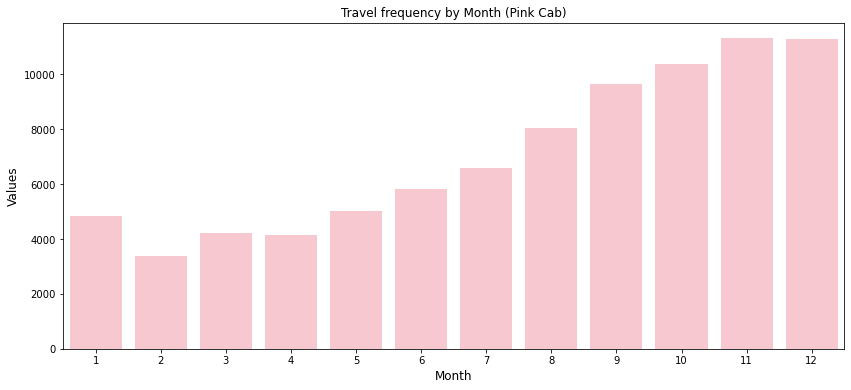

In [164]:
plt.figure(figsize=(14,6))
sns.barplot(x=plot0.index,y=plot0.values,color = 'pink')
plt.title('Travel frequency by Month (Pink Cab)',fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Values',fontsize = 12)
plt.show()

In [165]:
plot1m = taxi_data[taxi_data.Company=='Yellow Cab'].groupby(['Month']).Transaction_ID.count()


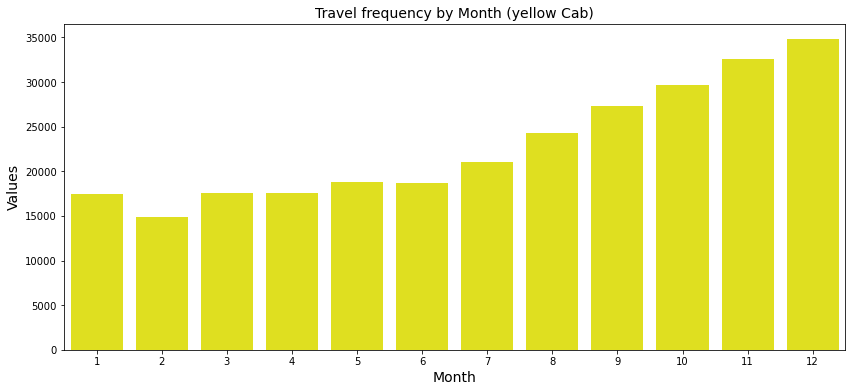

In [166]:
plt.figure(figsize=(14,6))
sns.barplot(x=plot1m.index,y=plot1m.values,color = 'yellow')
plt.title('Travel frequency by Month (yellow Cab)',fontsize = 14)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Values',fontsize = 14)
plt.show()

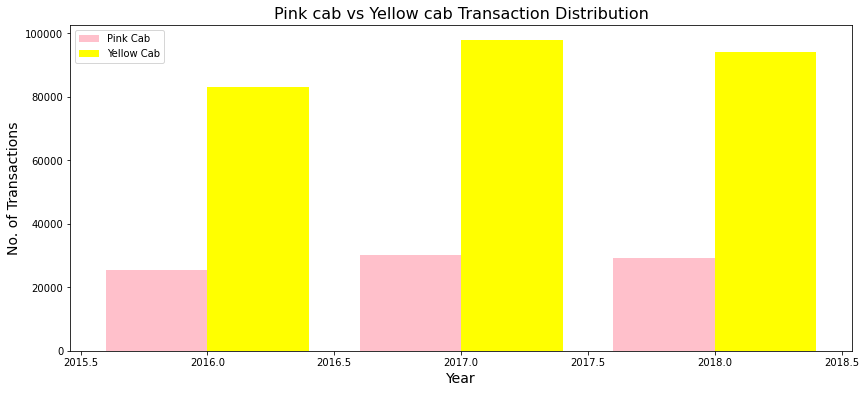

In [202]:
plot1 = taxi_data[taxi_data.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
plot2 = taxi_data[taxi_data.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1.values, width=0.4, color='pink', align='center',label='Pink Cab')
ax.bar(plot1.index+0.2, plot2.values, width=0.4, color='yellow', align='center',label='Yellow Cab')
plt.title("Pink cab vs Yellow cab Transaction Distribution",fontsize = 16)
plt.ylabel('No. of Transactions',fontsize = 14)
plt.xlabel('Year',fontsize = 14)
plt.legend()
plt.show()

In [168]:
# pip install plotly


In [201]:
# plot1c = taxi_data[taxi_data.Company=='Pink Cab'].groupby('City').count()
# plot2c = taxi_data[taxi_data.Company=='Yellow Cab'].groupby('City').count()
# plt.figure(figsize=(14,6))
# ax = plt.subplot(111)
# ax.bar(plot1c.index-0.2, plot1c.values, width=0.4, color='pink', align='center',label='Pink Cab')
# ax.bar(plot1c.index+0.2, plot2c.values, width=0.4, color='yellow', align='center',label='Yellow Cab')
# plt.title("Pink cab vs Yellow cab",fontsize = 16)
# plt.ylabel('No. of Transactions',fontsize = 14)
# plt.xlabel('Year',fontsize = 14)
# plt.legend()
# plt.show()

##

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objs as go
import plotly
import plotly.graph_objects as go

##

data1_0 = taxi_data[taxi_data["Company"] == "Pink Cab"].groupby("City").count()
data1_1 = taxi_data[taxi_data["Company"] == "Yellow Cab"].groupby("City").count()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=data1_0.index,
                    y=data1_0['Users'],
                    name='Pink Cab',
                    marker_color='pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=data1_1.index,
                    y=data1_1['Users'],
                    name='Yellow Cab',
                    marker_color='yellow'
                    ))
fig.update_layout(
    yaxis_title="Users",
    title="Pink & Yellow Cab Firm Users Distribution Over City" )


In [170]:
taxi_data


,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Profit
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,2016,29290,Card,Male,28,10813,"814,885","24,701",57.3150
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,7,2018,29290,Cash,Male,28,10813,"814,885","24,701",281.2772
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,11,2018,29290,Card,Male,28,10813,"814,885","24,701",194.6480
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,2016,27703,Card,Male,27,9237,"814,885","24,701",23.6660
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,4,2018,27703,Card,Male,27,9237,"814,885","24,701",253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-02,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,3,2018,51406,Cash,Female,29,6829,"418,859","127,001",143.6180
359388,10319775,2018-04-12,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,4,2018,51406,Cash,Female,29,6829,"418,859","127,001",23.0464
359389,10347676,2018-07-05,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,7,2018,51406,Card,Female,29,6829,"418,859","127,001",-5.8540
359390,10358624,2018-08-01,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,8,2018,51406,Cash,Female,29,6829,"418,859","127,001",-6.0900


In [175]:
## gender graph


data1_0 = taxi_data[taxi_data["Company"] == "Pink Cab"].groupby("Gender").count()
data1_1 = taxi_data[taxi_data["Company"] == "Yellow Cab"].groupby("Gender").count()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=data1_0.index,
                    y=data1_0['Transaction_ID'],
                    name='Pink Cab',
                    marker_color='pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=data1_1.index,
                    y=data1_1['Transaction_ID'],
                    name='Yellow Cab',
                    marker_color='yellow'
                    ))
fig.update_layout(
    xaxis_title="Gender",
    title="Distribution of pink & yellow taxi use by gender" )

### Profit analysis

In [212]:
# profit Distribution bar chart


data1_0 = taxi_data[taxi_data["Company"] == "Pink Cab"].groupby("Year").sum()
data1_1 = taxi_data[taxi_data["Company"] == "Yellow Cab"].groupby("Year").sum()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=data1_0.index,
                    y=data1_0['Profit'],
                    name='Pink Cab',
                    marker_color='pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=data1_1.index,
                    y=data1_1['Profit'],
                    name='Yellow Cab',
                    marker_color='yellow'
                    ))
fig.update_layout(
    yaxis_title="Profit",
    title="Pink & Yellow Cab Firm Profit during period of study" )

In [179]:
# profit line chart

years_list = ["2016","2017","2018"]

def year_pink():
    
    
    
    profit_2016 = round ( taxi_data[(taxi_data['Year'] == 2016) & (taxi_data.Company == "Pink Cab")]["Profit"].sum() ,2)
    profit_2017 = round ( taxi_data[(taxi_data['Year'] == 2017) & (taxi_data.Company == "Pink Cab")]["Profit"].sum() ,2)
    profit_2018 = round ( taxi_data[(taxi_data['Year'] == 2018) & (taxi_data.Company == "Pink Cab")]["Profit"].sum() ,2)
    
    profits = [profit_2016, profit_2017, profit_2018]
    
    return profits

   

def year_yellow():
    
    
    profit_2016 = round ( taxi_data[(taxi_data['Year'] == 2016) & (taxi_data.Company == "Yellow Cab")]["Profit"].sum() ,2)
    profit_2017 = round ( taxi_data[(taxi_data['Year'] == 2017) & (taxi_data.Company == "Yellow Cab")]["Profit"].sum() ,2)
    profit_2018 = round ( taxi_data[(taxi_data['Year'] == 2018) & (taxi_data.Company == "Yellow Cab")]["Profit"].sum() ,2)
    
    profits = [profit_2016, profit_2017, profit_2018]
    
    return profits
   

yellow = year_yellow()
pink = year_pink()
zippedy = zip(yellow,years_list)
zippedp = zip(pink,years_list)

datap = pd.DataFrame(zippedp,columns=["Profit","Year"])
datay = pd.DataFrame(zippedy,columns=["Profit","Year"])

fig = go.Figure()
fig.add_trace(go.Scatter(x=datay.Year, y=datay.Profit,
                    mode='lines+markers',
                    name='Yellow Cab'
                    ))
fig.add_trace(go.Scatter(x=datap.Year, y=datap.Profit,
                    mode='lines+markers',
                    name='Pink Cab'
                     ))
fig.update_layout(
    title="Total Profit per year by Cab Firm",
    xaxis_title="Years",
    yaxis_title="Profits",
    legend_title="Cab Companies",
)

fig.show()

In [209]:
total_trxs_by_Cab_Firm = taxi_data.groupby("Company")["Profit"].sum()
total_trxs_by_Cab_Firm = pd.DataFrame(total_trxs_by_Cab_Firm)
fig1 = px.pie(total_trxs_by_Cab_Firm,
                        values=total_trxs_by_Cab_Firm["Profit"],
                        names=total_trxs_by_Cab_Firm.index ,title="Total Profit of Trip by Cab Firm"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 700, height = 600)

In [211]:
#
data1_0 = taxi_data[taxi_data["Company"] == "Pink Cab"].groupby("City").sum()
data1_1 = taxi_data[taxi_data["Company"] == "Yellow Cab"].groupby("City").sum()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=data1_0.index,
                    y=data1_0['Profit'],
                    name='Pink Cab',
                    marker_color='pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=data1_1.index,
                    y=data1_1['Profit'],
                    name='Yellow Cab',
                    marker_color='yellow'
                    ))
fig.update_layout(
    yaxis_title="Profit",
    title="Yearly Pink & Yellow Cab Firm Profit Distribution Over City" )

## Recomandations:

##### We have evaluated both the cab companies on following points and found Yellow cab better than Pink cab:

* Customer : Yellow cab has higher customer than Pink cab. We have also observed that Yellow cab is doing good in covering other cab users as compared to Pink cab.

* Age & Gender: Yellow cab has customer in all ages and both genders and it’s been observed that it’s even popular in 60+ age group.

* spread : yellow cab has more spread over the cities compare with pink cab, that can be seen in the Transaction graphs.The yellow taxi company has a wider spread than the pink taxi during the years, according to the chart

* Profit : Yellow cab’s profit per KM is almost three times the average profit per KM of the Pink cab as can seen in the graphs. However, According to "Pink & Yellow Cab Firm Profit during period of study" showing that Both companies reached peak profits in 2017, But the yellow taxi company is higher during the entire period.



##### From all the above visualizations and the answers of the comparsion's questions we understand that Yellow Cap Frim is bigger than Pink Cap Firm in market Share. On the basis of above point , we will recommend Yellow cab for investment.


In [213]:
taxi_data.to_excel (r"D:/data_science_course/second_week/taxi_data_master_data.xlsx", index = False, header=True)
